In [11]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
# from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from numpy import random, float
import numpy as np
%matplotlib inline


iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

model = KMeans(n_clusters=3, random_state=0)
# model = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100) if we are working with big data
model = model.fit(features_std)

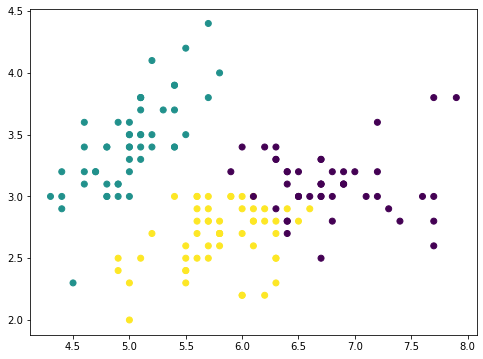

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(features[:,0], features[:,1], c=model.labels_.astype(float))
plt.show()

In [5]:
model.labels_
iris.target
new_observation = [[0.8, 0.8, 0.8, 0.8]]
model.predict(new_observation)

array([0], dtype=int32)

#### split train test

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features_std, iris.target, test_size=.2, random_state=33)

In [7]:
model = model.fit(xtrain)
y_pred= model.predict(xtest)

In [8]:
from sklearn import metrics
print('Adjusted rand score:{:.2}'.format(metrics.adjusted_rand_score(ytest, y_pred)))

Adjusted rand score:0.57


In [9]:
print(metrics.confusion_matrix(ytest, y_pred))

[[ 0  0  8]
 [ 5  3  0]
 [ 2 12  0]]


In [10]:
print(metrics.accuracy_score(ytest, y_pred))

0.1


### elbow method to choose k

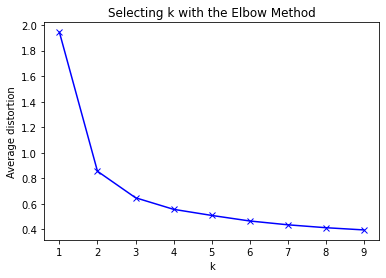

In [45]:
from scipy.spatial.distance import cdist
X=features
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()    